## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E03F6F3BE0>,
      dtype=object)

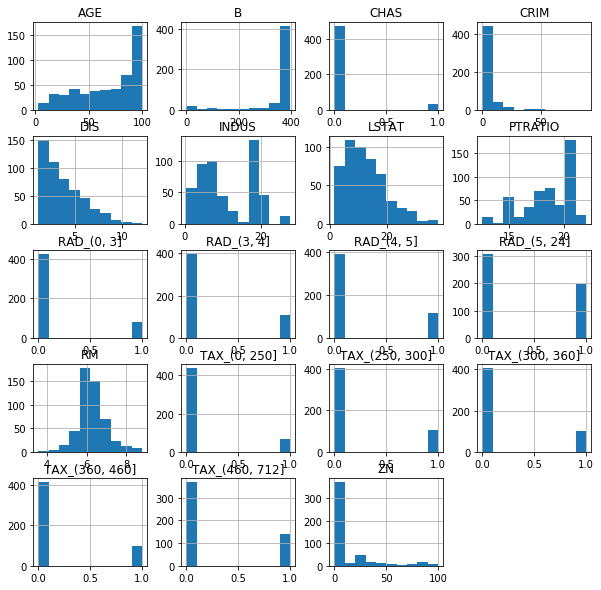

In [3]:
boston_features.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E040570390>,
      dtype=object)

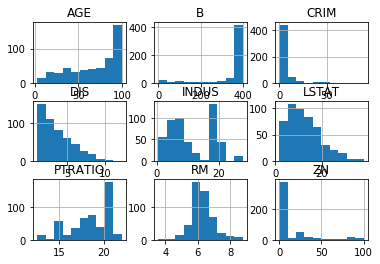

In [4]:
boston_continuous=boston_features.drop(['CHAS'],axis=1)
for column in boston_continuous:
    if column.startswith("RAD") or column.startswith("TAX"):
        boston_continuous.drop(column,axis=1,inplace=True)
    else:
        continue
boston_continuous.head()
boston_continuous.hist()

## Perform log transformations for the variables where it makes sense

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: supplied range of [-inf, 4.605170185988092] is not finite

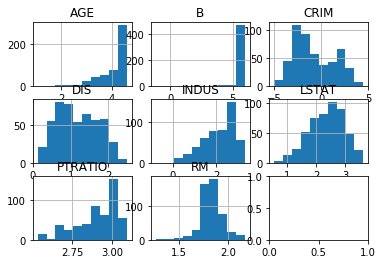

In [5]:
import numpy as np
for column in boston_continuous:
    boston_continuous[column] = boston_continuous[column].map(lambda x: np.log(x))
boston_continuous.hist()

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

`ZN` has a lot of zeros and, unfortunately we can't take the log of 0 so (because the domain of logs is x>0) which means that we won't be able to do a straight up log transform on `ZN`.  We could do `log(x+1)` though.

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

## Min-Max scaling

In [6]:
print(boston_continuous['ZN'].max(),boston_continuous['ZN'].min())

4.605170185988092 -inf


In [7]:
boston_continuous.drop(['ZN'],axis=1,inplace=True) #I don't know why the minimum value for ZN is negative infinity so I'm just gonna drop it

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E04123F208>,
      dtype=object)

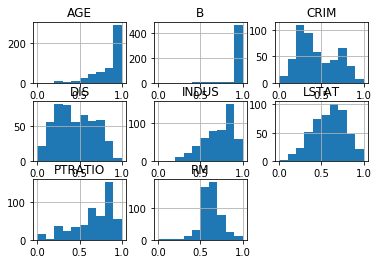

In [10]:
features_final1=boston_continuous.copy()
for column in boston_continuous:
    min_x=boston_continuous[column].min()
    max_x=boston_continuous[column].max()
    features_final1[column] = boston_continuous[column].map(lambda x: (x-min_x)/(max_x-min_x))
features_final1.hist()

So now all of the variables are scaled to have magnitudes from 0 to 1, which makes them easier to compare. 

## Standardizing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E040D7A5C0>,
      dtype=object)

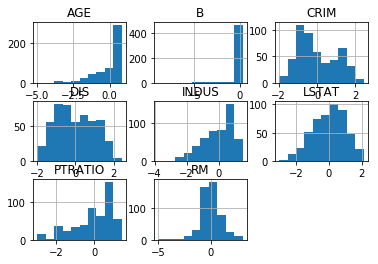

In [12]:
features_final2=boston_continuous.copy()
for column in boston_continuous:
    std=boston_continuous[column].std()
    mean=boston_continuous[column].mean()
    features_final2[column] = boston_continuous[column].map(lambda x: (x-mean)/std)
features_final2.hist()

All of the values have similar magnitudes now but there are negative values so any log or root transformations would need to happen before standardizing (which we did, luckily).

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.